In [3]:
import pandas as pd

df = pd.read_csv(r"C:\Users\gezze\Downloads\kicksharing.csv")
df.head()  # Первые 5 строк
df.info()  # Информаиция (типы данных и количество непустых значений)
df.describe()  # Описание
df.isnull().sum()  # Сумма пропусков в каждом столбце


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                393828 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       190059 non-null  object 
 5   marital_status_cd        217729 non-null  object 
 6   lvn_state_nm             362572 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-null  object 
 14  book

order_rk                        0
party_rk                        0
gender_cd                    2921
age                             0
education_level_cd         206690
marital_status_cd          179020
lvn_state_nm                34177
minute_cost                     0
activation_cost                 0
hold_amount                     0
transport_model                 0
distance_km                     0
created_dttm                    0
book_start_dttm                 0
book_end_dttm                   0
book_time_zone_cd               0
local_book_start_dttm           0
nominal_price_rub_amt           0
loyalty_accrual_rub_amt     29757
loyalty_accrual_bns_amt    374801
dtype: int64

In [5]:
import pandas as pd

df = pd.read_csv(r"C:\Users\gezze\Downloads\kicksharing.csv")

# Изменение типов данных
df['created_dttm'] = pd.to_datetime(df['created_dttm'])
df['book_start_dttm'] = pd.to_datetime(df['book_start_dttm'])
df['book_end_dttm'] = pd.to_datetime(df['book_end_dttm'])
df['local_book_start_dttm'] = pd.to_datetime(df['local_book_start_dttm'])

# Преобразование столбцов с типом 'object' в категориальные
categorical_columns = ['gender_cd', 'education_level_cd', 'marital_status_cd', 'lvn_state_nm', 'transport_model']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Категориальные данные заполняем модой
df['gender_cd'] = df['gender_cd'].fillna(df['gender_cd'].mode()[0])
df['education_level_cd'] = df['education_level_cd'].fillna(df['education_level_cd'].mode()[0])
df['marital_status_cd'] = df['marital_status_cd'].fillna(df['marital_status_cd'].mode()[0])
df['lvn_state_nm'] = df['lvn_state_nm'].fillna(df['lvn_state_nm'].mode()[0])

# Числовые данные заполняем медианой
df['loyalty_accrual_rub_amt'] = df['loyalty_accrual_rub_amt'].fillna(df['loyalty_accrual_rub_amt'].median())
df['loyalty_accrual_bns_amt'] = df['loyalty_accrual_bns_amt'].fillna(df['loyalty_accrual_bns_amt'].median())

# Удаление строк с пропусками в столбцах, где они критичны
df = df.dropna(subset=['gender_cd', 'education_level_cd', 'marital_status_cd'])

# Удаление дубликатов
df = df.drop_duplicates()

# Убираем выбросы, где значения больше 99.5% квантиля
def remove_outliers(df, column):
    q75 = df[column].quantile(0.75)
    q25 = df[column].quantile(0.25)
    iqr = q75 - q25
    lower_bound = q25 - 1.5 * iqr
    upper_bound = q75 + 1.5 * iqr
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, 'minute_cost')
df = remove_outliers(df, 'activation_cost')
df = remove_outliers(df, 'nominal_price_rub_amt')

# Вывод
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 365278 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order_rk                 365278 non-null  int64         
 1   party_rk                 365278 non-null  int64         
 2   gender_cd                365278 non-null  category      
 3   age                      365278 non-null  int64         
 4   education_level_cd       365278 non-null  category      
 5   marital_status_cd        365278 non-null  category      
 6   lvn_state_nm             365278 non-null  category      
 7   minute_cost              365278 non-null  float64       
 8   activation_cost          365278 non-null  float64       
 9   hold_amount              365278 non-null  float64       
 10  transport_model          365278 non-null  category      
 11  distance_km              365278 non-null  float64       
 12  created_dttm         

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Устанавливаем стиль графиков
plt.style.use('ggplot')

# 1. Распределение возраста пользователей
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.savefig('age_distribution.png')
plt.close()

# 2. Распределение пользователей по полу
plt.figure(figsize=(8, 6))
sns.countplot(x='gender_cd', data=df)
plt.title('Распределение пользователей по полу')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.savefig('gender_distribution.png')
plt.close()

# 3. Распределение стоимости поездок
plt.figure(figsize=(10, 6))
sns.histplot(df['nominal_price_rub_amt'], bins=30, kde=True)
plt.title('Распределение стоимости поездок')
plt.xlabel('Стоимость поездки (руб.)')
plt.ylabel('Количество')
plt.savefig('price_distribution.png')
plt.close()

# 4. Зависимость стоимости поездки от расстояния
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_km', y='nominal_price_rub_amt', data=df)
plt.title('Зависимость стоимости поездки от расстояния')
plt.xlabel('Расстояние (км)')
plt.ylabel('Стоимость поездки (руб.)')
plt.savefig('price_vs_distance.png')
plt.close()

# 5. Популярные регионы
plt.figure(figsize=(12, 6))
top_regions = df['lvn_state_nm'].value_counts().head(10)
sns.barplot(x=top_regions.values, y=top_regions.index)
plt.title('Топ-10 регионов по количеству поездок')
plt.xlabel('Количество поездок')
plt.ylabel('Регион')
plt.savefig('top_regions.png')
plt.close()

print("Анализ завершен. Графики сохранены.")

Анализ завершен. Графики сохранены.


In [8]:
import pandas as pd
# Группировка по идентификатору и сумма растояний
total_distance_per_user = df.groupby('party_rk')['distance_km'].sum().reset_index()
# Сортировка по убыванию расстояния
total_distance_per_user_sorted = total_distance_per_user.sort_values(by='distance_km', ascending=False)

# Вывод
print(total_distance_per_user_sorted)

         party_rk   distance_km
31883   695658540  56062.467041
13528   293397690  32748.352451
1299     58660326  25854.711241
46531   966004075  16117.336011
10959   260951848  14930.514230
...           ...           ...
4003    130101249      0.000000
1064     30172513      0.000000
33579   724561196      0.000000
49507  1025394645      0.000000
33992   730228535      0.000000

[57371 rows x 2 columns]


In [9]:
# Порог длинны поездок в км
threshold_km = 200

# Фильтрация поездок, превышающих порог
suspicious_trips = df[df['distance_km'] > threshold_km].copy()

# Сортировка по убыванию
suspicious_trips = suspicious_trips.sort_values(by='distance_km', ascending=False)

# Длительность поездки в минутах
suspicious_trips['trip_duration_min'] = (
    pd.to_datetime(suspicious_trips['book_end_dttm']) - 
    pd.to_datetime(suspicious_trips['book_start_dttm'])
).dt.total_seconds() / 60

# Средняя скорость
suspicious_trips['speed_kmph'] = suspicious_trips['distance_km'] / (suspicious_trips['trip_duration_min'] / 60)


# Вывод
columns_to_show = ['party_rk', 'distance_km', 'transport_model', 'trip_duration_min', 'speed_kmph', 'nominal_price_rub_amt']
print(suspicious_trips[columns_to_show].head(15))

          party_rk   distance_km transport_model  trip_duration_min  \
11244    695658540  56012.640308              SL          16.000711   
175173   293397690  32742.764788             Max           2.990362   
313313    58660326  25834.347823              SL           2.743284   
38639    966004075  16092.447582             Max           5.483165   
149103   260951848  14748.053050              SL           2.013574   
378777   369824391  13629.192952           ES400          12.998221   
37642    323500746  11251.072042              SL           5.648910   
145930  1026670454  11184.538862              SL          19.424625   
260618   121213012   9903.272869              SL           2.481145   
54164    506650684   8732.069446               E          22.646763   
227236    10186604   8024.288603              SL           4.835345   
78258     82054741   7743.818059              SL           0.879438   
367576   383236745   7063.909496              SL          11.102308   
142562

In [13]:
# Длительность поездки в минутах для df
df['trip_duration_min'] = (
    pd.to_datetime(df['book_end_dttm']) - 
    pd.to_datetime(df['book_start_dttm'])
).dt.total_seconds() / 60

# Удаляем поездки длительностью < 5 минут и расстоянием > 200 км
df_cleaned = df[~((df['trip_duration_min'] < 5) & (df['distance_km'] > 200))].copy()

In [15]:
# Удаление длительности > 0
df = df[df['trip_duration_min'] > 0]

In [17]:
# Преобразуем даты в формат datetime
df['book_start_dttm'] = pd.to_datetime(df['book_start_dttm'])
df['book_end_dttm'] = pd.to_datetime(df['book_end_dttm'])

#  Длительность поездки в минутах
df['trip_duration_min'] = (df['book_end_dttm'] - df['book_start_dttm']).dt.total_seconds() / 60

# Удалим нулевую или отрицательную длительность
df = df[df['trip_duration_min'] > 0]

# Рассчитываем среднюю скорость в км/ч
df['speed_kmph'] = df['distance_km'] / (df['trip_duration_min'] / 60)

# Фильтруем поездки, где скорость превышает 100 км/ч
fast_trips = df[df['speed_kmph'] > 100].copy()

# Сортируем по убыванию скорости
fast_trips = fast_trips.sort_values(by='speed_kmph', ascending=False)

# Вывод
columns_to_show = ['party_rk', 'distance_km', 'trip_duration_min', 'speed_kmph', 'transport_model', 'nominal_price_rub_amt']
print(fast_trips[columns_to_show].head(20))

          party_rk   distance_km  trip_duration_min     speed_kmph  \
175173   293397690  32742.764788           2.990362  656965.911903   
313313    58660326  25834.347823           2.743284  565038.524073   
78258     82054741   7743.818059           0.879438  528324.962434   
149103   260951848  14748.053050           2.013574  439458.979738   
260618   121213012   9903.272869           2.481145  239484.721874   
11244    695658540  56012.640308          16.000711  210038.067806   
38639    966004075  16092.447582           5.483165  176092.992673   
328047   809939320    961.441985           0.460977  125139.812588   
37642    323500746  11251.072042           5.648910  119503.475238   
57396    506662047   4466.245713           2.589063  103502.609064   
227236    10186604   8024.288603           4.835345   99570.426240   
156628   506662047   4502.709587           4.082472   66176.222457   
263535   506662047   1934.635287           1.824588   63618.821569   
378777   369824391  

In [19]:
# Удаляем поездки, где скорость больше 100 км/ч
df_cleaned = df[df['speed_kmph'] <= 100]

# Выводим после фильтрации
df_cleaned_sorted = df_cleaned.sort_values(by='speed_kmph', ascending=False)
columns_to_show = ['party_rk', 'distance_km', 'trip_duration_min', 'speed_kmph', 'transport_model', 'nominal_price_rub_amt']
print(df_cleaned_sorted[columns_to_show].head(20))

          party_rk  distance_km  trip_duration_min  speed_kmph  \
22963    553253314    31.220559          18.787925   99.704124   
317487   212666580    35.368046          21.337188   99.454661   
344582  1042588698    16.195153           9.817026   98.982031   
122687   826679791    12.382459           7.515613   98.853882   
111827   514407599    43.034465          26.146103   98.755365   
29809    238240052     7.894534           4.797628   98.730468   
14474   1000233257    10.820092           6.587495   98.551191   
143558   381303251     8.286058           5.055934   98.332671   
194358   375673500    13.976064           8.552758   98.046016   
367456  1182858099    23.146619          14.173998   97.982035   
102      857791744     6.586748           4.036045   97.918840   
115048   131156403     6.106359           3.745231   97.826158   
321552    84729771     3.301996           2.030847   97.555238   
218475    54722915    12.360579           7.602435   97.552257   
245325   3

In [21]:

# Теоретическое расстояние для каждой поездки
df_cleaned['theoretical_distance_km'] = df_cleaned['speed_kmph'] * (df_cleaned['trip_duration_min'] / 60)

# Отклонение между фактическим и теоретическим расстоянием
df_cleaned['distance_difference'] = df_cleaned['distance_km'] - df_cleaned['theoretical_distance_km']

# Фильтрация поездок, где разница больше 10 км
suspicious_trips = df_cleaned[df_cleaned['distance_difference'].abs() > 10]

# Вывод
columns_to_show = ['party_rk', 'distance_km', 'speed_kmph', 'trip_duration_min', 'theoretical_distance_km', 'distance_difference']
print(suspicious_trips[columns_to_show].head(20))


Empty DataFrame
Columns: [party_rk, distance_km, speed_kmph, trip_duration_min, theoretical_distance_km, distance_difference]
Index: []


In [23]:
# Проверка времение поездки (больше 24 часов)
df_cleaned['trip_duration_min'] = (df_cleaned['book_end_dttm'] - df_cleaned['book_start_dttm']).dt.total_seconds() / 60
df_invalid_trip_duration = df_cleaned[(df_cleaned['trip_duration_min'] > 1440)]
print(df_invalid_trip_duration[['order_rk', 'trip_duration_min']].head(20))


Empty DataFrame
Columns: [order_rk, trip_duration_min]
Index: []


In [25]:
print(df_cleaned['gender_cd'].unique())


['M', 'F']
Categories (2, object): ['F', 'M']


In [27]:
print(df_cleaned['marital_status_cd'].unique())


['DIV', 'MAR', 'UNM', 'CIV', 'WID']
Categories (5, object): ['CIV', 'DIV', 'MAR', 'UNM', 'WID']


In [29]:
# Проверка на уникальность идентификатора заказа
df_duplicates = df_cleaned[df_cleaned.duplicated(subset=['order_rk'])]
print(df_duplicates[['order_rk']].head(20))


Empty DataFrame
Columns: [order_rk]
Index: []


In [31]:
# Вывод 10 самых частых регионов
top_10_regions = df_cleaned['lvn_state_nm'].value_counts().head(10)
print(top_10_regions)


lvn_state_nm
Г МОСКВА              115168
МОСКОВСКАЯ ОБЛ         37330
Г САНКТ-ПЕТЕРБУРГ      34270
СВЕРДЛОВСКАЯ ОБЛ       27776
КРАСНОДАРСКИЙ КРАЙ     15174
РЕСП ТАТАРСТАН          8815
РЕСП БАШКОРТОСТАН       7739
НИЖЕГОРОДСКАЯ ОБЛ       7167
НОВОСИБИРСКАЯ ОБЛ       6803
КРАСНОЯРСКИЙ КРАЙ       5233
Name: count, dtype: int64


Пропуски в age: 0
Пропуски в distance_km: 0
Пропуски в nominal_price_rub_amt: 0
Пропуски в minute_cost: 0
Пропуски в hold_amount: 0

Корреляционная матрица:
                            age  distance_km  nominal_price_rub_amt  \
age                    1.000000    -0.014330               0.047269   
distance_km           -0.014330     1.000000               0.648156   
nominal_price_rub_amt  0.047269     0.648156               1.000000   
minute_cost            0.062831    -0.126930               0.231287   
hold_amount           -0.002577     0.007570               0.008519   

                       minute_cost  hold_amount  
age                       0.062831    -0.002577  
distance_km              -0.126930     0.007570  
nominal_price_rub_amt     0.231287     0.008519  
minute_cost               1.000000     0.017196  
hold_amount               0.017196     1.000000  


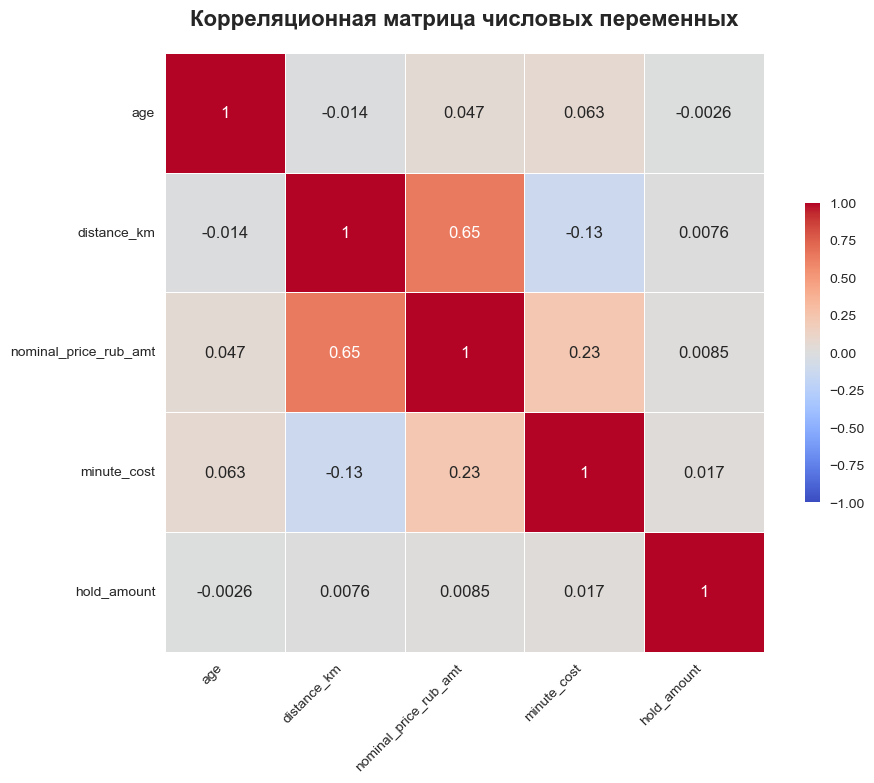

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Стиль
plt.style.use('seaborn-v0_8')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10, 8)

# Проверка пропусков
print("Пропуски в age:", df_cleaned['age'].isna().sum())
print("Пропуски в distance_km:", df_cleaned['distance_km'].isna().sum())
print("Пропуски в nominal_price_rub_amt:", df_cleaned['nominal_price_rub_amt'].isna().sum())
print("Пропуски в minute_cost:", df_cleaned['minute_cost'].isna().sum())
print("Пропуски в hold_amount:", df_cleaned['hold_amount'].isna().sum())
df_cleaned = df_cleaned.dropna(subset=['age', 'distance_km', 'nominal_price_rub_amt', 'minute_cost', 'hold_amount'])

# Выбор переменных
numeric_vars = ['age', 'distance_km', 'nominal_price_rub_amt', 'minute_cost', 'hold_amount']
correlation_matrix = df_cleaned[numeric_vars].corr()

# Вывод
print("\nКорреляционная матрица:")
print(correlation_matrix)

# Визуализация
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .5})

# Оформление
plt.title('Корреляционная матрица числовых переменных', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

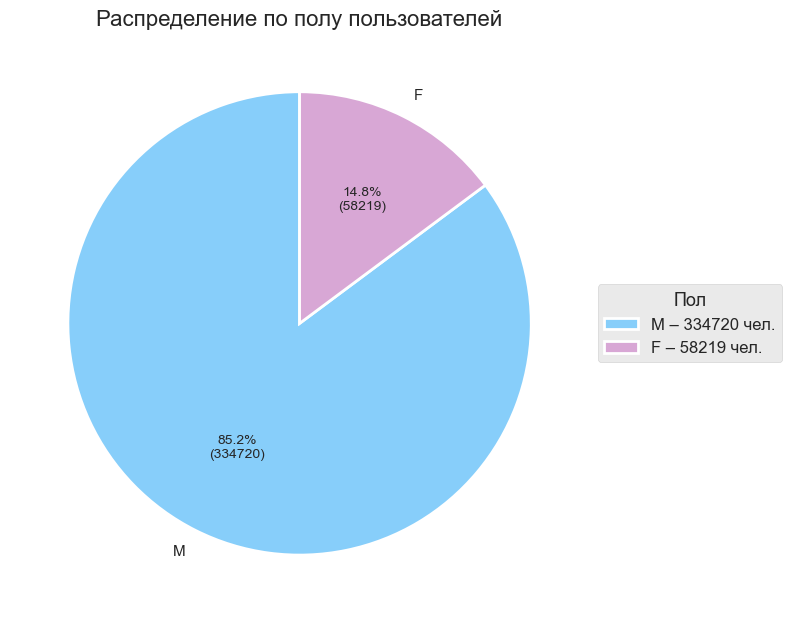

In [219]:
import matplotlib.pyplot as plt
import numpy as np

# Количество по полу
gender_counts = df_cleaned['gender_cd'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values

# Цвета
color_map = {'F': '#D8A7D5', 'M': '#87CEFA'}
colors = [color_map[label] for label in labels]

# Функция форматирования
def format_label(pct, allvals):
    absolute = int(round(pct / 100 * np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute})"

# Построение диаграммы
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct=lambda pct: format_label(pct, sizes),
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

# Сбоку
ax.legend(
    wedges,
    [f"{label} – {gender_counts[label]} чел." for label in labels],
    title="Пол",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=12,
    title_fontsize=13
)

# Заголовок
plt.title('Распределение по полу пользователей', fontsize=16)

plt.tight_layout()
plt.show()


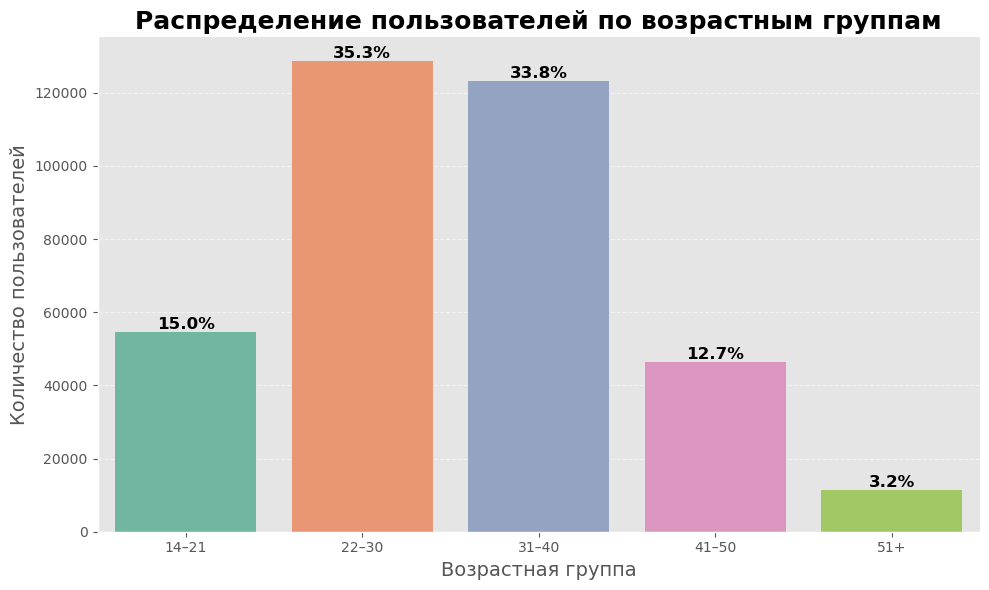

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Категории возрастов
age_bins = [14, 21, 30, 40, 50, 150]
age_labels = ['14–21', '22–30', '31–40', '41–50', '51+']

# Группировка
df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=age_bins, labels=age_labels, right=True)

# Количество в каждой возрастной группе
age_group_counts = df_cleaned['age_group'].value_counts().sort_index()

# Столбчатая диаграмма
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='Set2')

# Над столбцами
total = age_group_counts.sum()
for i, value in enumerate(age_group_counts.values):
    percent = value / total * 100
    barplot.text(i, value + 1, f'{percent:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Подписи, оформление
plt.title('Распределение пользователей по возрастным группам', fontsize=18, fontweight='bold')
plt.xlabel('Возрастная группа', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)

sns.despine()

plt.tight_layout()
plt.show()


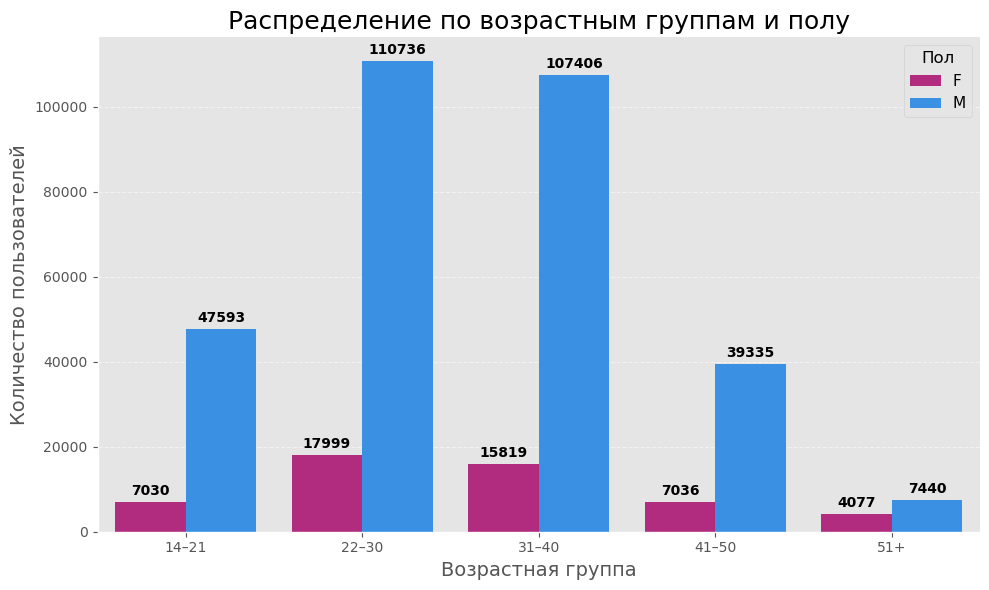

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Категории возрастов
age_bins = [14, 21, 30, 40, 50, 150]
age_labels = ['14–21', '22–30', '31–40', '41–50', '51+']

# Возрастная группа
df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=age_bins, labels=age_labels, right=True)

# Группировка по возрасту и полу
age_gender_counts = df_cleaned.groupby(['age_group', 'gender_cd']).size().reset_index(name='count')

# Цвета
palette = {'F': '#C71585',  
           'M': '#1E90FF'}  

# Диаграмма
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=age_gender_counts,
    x='age_group',
    y='count',
    hue='gender_cd',
    palette=palette
)

# Подписи над столбцами
for p in barplot.patches:
    height = p.get_height()
    if height > 0:
        barplot.annotate(f'{int(height)}',
                         (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='bottom',
                         fontsize=10, fontweight='bold',
                         color='black', xytext=(0, 3),
                         textcoords='offset points')

plt.title('Распределение по возрастным группам и полу', fontsize=18)
plt.xlabel('Возрастная группа', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.legend(title='Пол', title_fontsize=12, fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()

Пропуски в local_book_start_dttm: 0


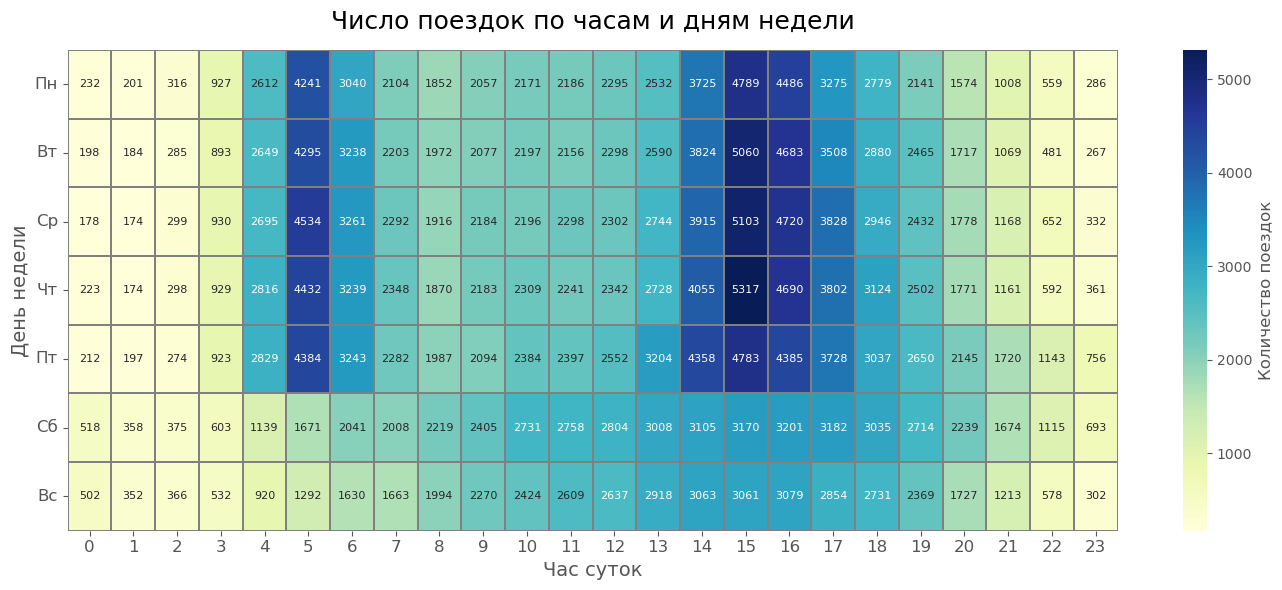

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Проверка 
print("Пропуски в local_book_start_dttm:", df_cleaned['local_book_start_dttm'].isna().sum())

# Удаление строк с пропусками в local_book_start_dttm
df_cleaned = df_cleaned.dropna(subset=['local_book_start_dttm'])

# Преобразование в datetime
df_cleaned['local_book_start_dttm'] = pd.to_datetime(df_cleaned['local_book_start_dttm'])

# Час и день недели
df_cleaned['hour'] = df_cleaned['local_book_start_dttm'].dt.hour
# Пн=0, Вс=6
df_cleaned['weekday'] = df_cleaned['local_book_start_dttm'].dt.dayofweek  

# Подписи 
weekday_labels = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
df_cleaned['weekday_name'] = df_cleaned['weekday'].map(dict(zip(range(7), weekday_labels)))

# Группировка по неделе и часу
heatmap_data = df_cleaned.groupby(['weekday_name', 'hour']).size().unstack().fillna(0)

for hour in range(24):
    if hour not in heatmap_data.columns:
        heatmap_data[hour] = 0
heatmap_data = heatmap_data[sorted(heatmap_data.columns)]

# Сортировка дней недели
heatmap_data = heatmap_data.loc[weekday_labels]

# График
plt.figure(figsize=(14, 6))
sns.heatmap(
    heatmap_data, 
    cmap='YlGnBu', 
    linewidths=0.3, 
    linecolor='gray',
    annot=True,  
    fmt='d',     
    cbar_kws={'label': 'Количество поездок'},  
    annot_kws={'size': 8}  
)

plt.title('Число поездок по часам и дням недели', fontsize=18, pad=15)
plt.xlabel('Час суток', fontsize=14)
plt.ylabel('День недели', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()

# Сохранение графика
plt.savefig('heatmap_trips_by_hour_and_day.png', dpi=300, bbox_inches='tight')
plt.show()

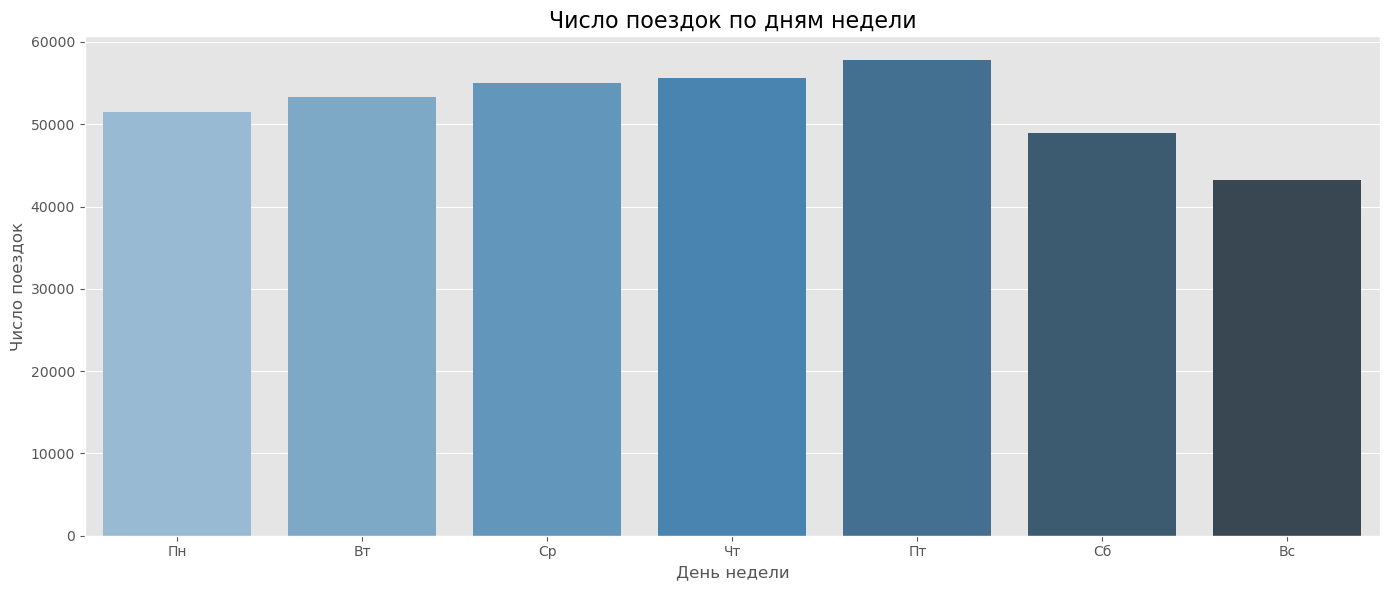

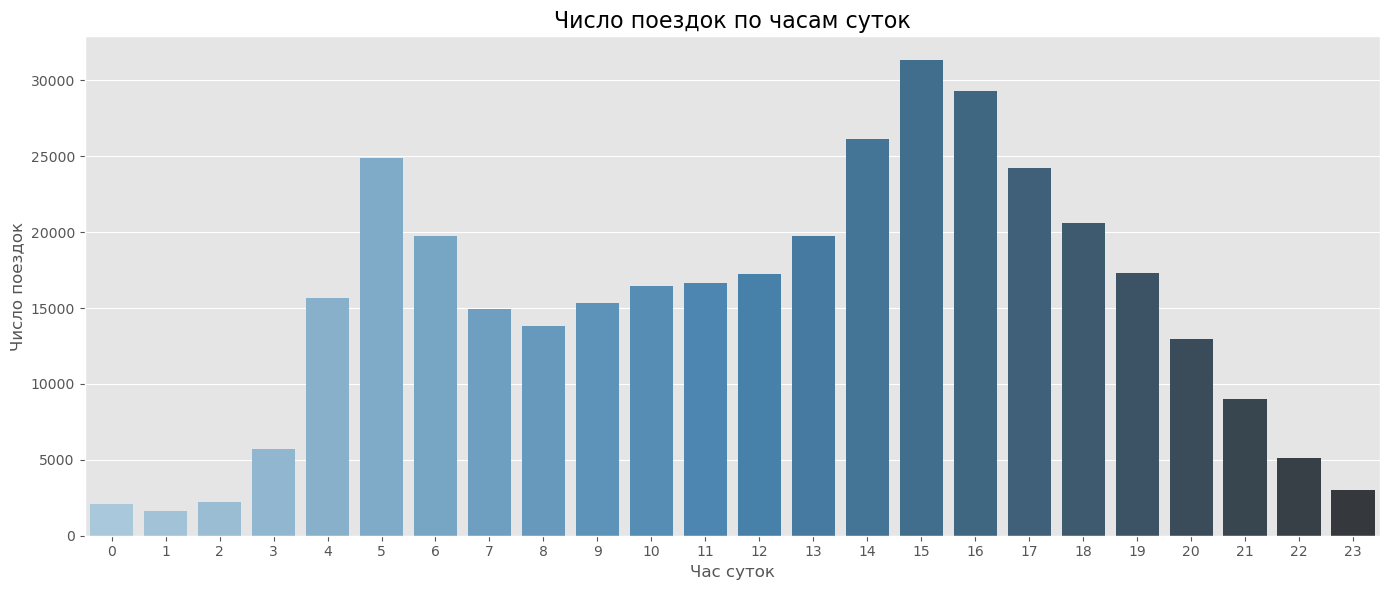

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_cleaned['local_book_start_dttm'] = pd.to_datetime(df_cleaned['local_book_start_dttm'])

# Час и день недели
df_cleaned['hour'] = df_cleaned['local_book_start_dttm'].dt.hour
# Пн=0, Вс=6
df_cleaned['weekday'] = df_cleaned['local_book_start_dttm'].dt.dayofweek  

# Подписи 
weekday_labels = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
df_cleaned['weekday_name'] = df_cleaned['weekday'].map(dict(zip(range(7), weekday_labels)))

# Количество поездок по дням недели
weekday_counts = df_cleaned['weekday_name'].value_counts().reindex(weekday_labels)

# Количество поездок по часам
hourly_counts = df_cleaned['hour'].value_counts().sort_index()

# График по дням недели
plt.figure(figsize=(14, 6))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette="Blues_d")
plt.title('Число поездок по дням недели', fontsize=16)
plt.xlabel('День недели', fontsize=12)
plt.ylabel('Число поездок', fontsize=12)
plt.tight_layout()
plt.show()

# График по часам
plt.figure(figsize=(14, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette="Blues_d")
plt.title('Число поездок по часам суток', fontsize=16)
plt.xlabel('Час суток', fontsize=12)
plt.ylabel('Число поездок', fontsize=12)
plt.tight_layout()
plt.show()

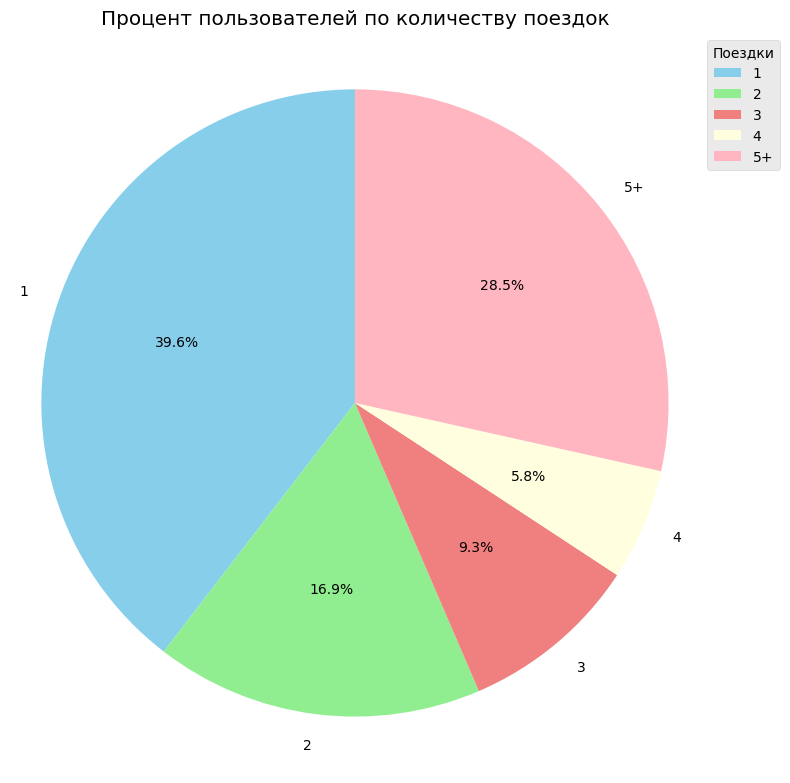

In [140]:
import pandas as pd
import matplotlib.pyplot as plt

# Количество поездок на клиента
trips_per_client = df_cleaned.groupby('party_rk')['order_rk'].count().reset_index()
trips_per_client.columns = ['party_rk', 'trip_count']

# Создание категорий количества поездок 1, 2, 3, 4, 5+
trips_per_client['trip_category'] = trips_per_client['trip_count'].apply(lambda x: min(x, 5)) 

# Группировка
trip_counts = trips_per_client['trip_category'].value_counts().sort_index()

# Обработка 5+ поездок
trip_counts_5_plus = trip_counts.loc[trip_counts.index >= 5].sum()
trip_counts = trip_counts[trip_counts.index < 5]
trip_counts['5+'] = trip_counts_5_plus

# Данные
labels = [str(i) if isinstance(i, int) else '5+' for i in trip_counts.index]
sizes = trip_counts.values

# Диаграмма
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink'])

# Легенда
plt.legend(labels=labels, title='Поездки', loc='upper left', bbox_to_anchor=(1, 1))

# Заголовок
plt.title('Процент пользователей по количеству поездок')

# Пропорции
plt.axis('equal')

plt.tight_layout()
plt.show()

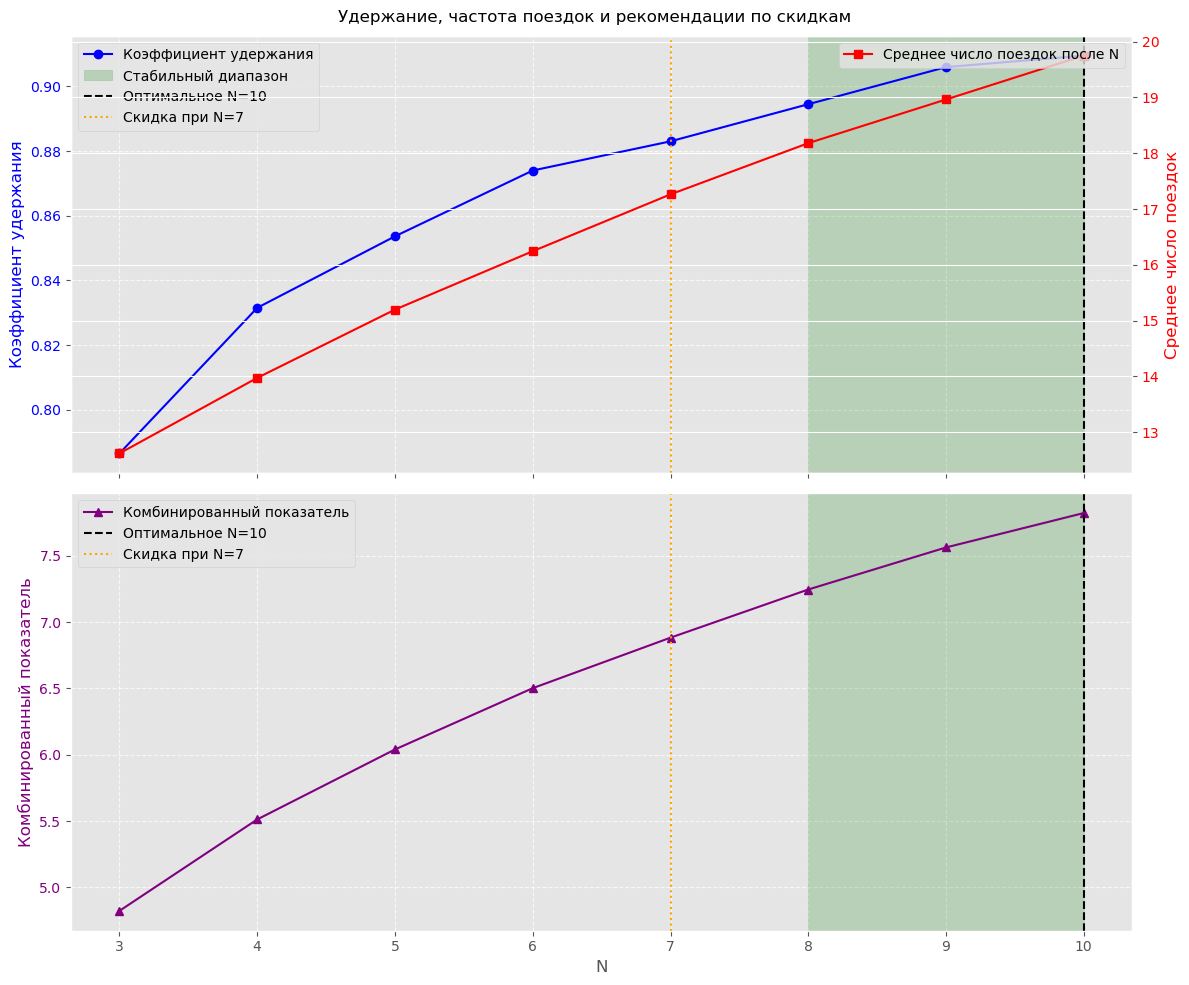


Результаты (все строки):
    N  retention_rate  avg_post_n_trips  ci_post_n_trips  eligible_users  \
0   3        0.786484         12.618438         0.286891           24949   
1   4        0.831516         13.972604         0.333610           19622   
2   5        0.853641         15.196798         0.378694           16316   
3   6        0.873995         16.243572         0.421011           13928   
4   7        0.883020         17.263001         0.463537           12173   
5   8        0.894502         18.181071         0.504586           10749   
6   9        0.905980         18.964068         0.543400            9615   
7  10        0.909540         19.750726         0.582952            8711   

   combined_score  retention_rate_change  
0        4.822987                    NaN  
1        5.512414               0.057256  
2        6.040021               0.026608  
3        6.502175               0.023844  
4        6.883064               0.010326  
5        7.246269              

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

# Число поездок на пользователя
trip_counts = df_cleaned.groupby('party_rk')['order_rk'].count().reset_index()
trip_counts.columns = ['party_rk', 'total_trips']

# Оценка удержания и частота поездок для N
def evaluate_n(df_eligible, n, total_eligible_users):
    df_post_n = df_eligible[df_eligible['trip_number'] > n]
    retained_users = df_post_n['party_rk'].unique()
    retention_rate = len(retained_users) / total_eligible_users if total_eligible_users > 0 else 0
    post_n_trips = df_post_n.groupby('party_rk')['order_rk'].count()
    avg_post_n_trips = post_n_trips.mean() if not post_n_trips.empty else 0
    ci_post_n_trips = 1.96 * sem(post_n_trips) if not post_n_trips.empty else 0
    if post_n_trips.empty:
        print(f"Предупреждение: Нет поездок после N={n} для расчета avg_post_n_trips")
    return {
        'N': n,
        'retention_rate': retention_rate,
        'avg_post_n_trips': avg_post_n_trips,
        'ci_post_n_trips': ci_post_n_trips,
        'eligible_users': total_eligible_users
    }

# N от 3 до 10
n_values = range(3, 11)

# Фильтрация для оптимизации
min_n = min(n_values)
eligible_users = trip_counts[trip_counts['total_trips'] >= min_n]['party_rk']
df_eligible = df_cleaned[df_cleaned['party_rk'].isin(eligible_users)].copy()
df_eligible['trip_number'] = df_eligible.groupby('party_rk')['order_rk'].cumcount() + 1

results = []
for n in n_values:
    eligible_n = trip_counts[trip_counts['total_trips'] >= n]['party_rk']
    df_eligible_n = df_eligible[df_eligible['party_rk'].isin(eligible_n)]
    result = evaluate_n(df_eligible_n, n, len(eligible_n))
    results.append(result)

results_df = pd.DataFrame(results)

# Минимум 5% от максимального числа пользователей
min_eligible_users = 0.05 * results_df['eligible_users'].max()
results_df = results_df[results_df['eligible_users'] >= min_eligible_users]

# Узкие доверительные интервалы (<50% от avg_post_n_trips)
results_df = results_df[results_df['ci_post_n_trips'] / results_df['avg_post_n_trips'] < 0.5]

# Процентные изменения метрик
results_df['retention_rate_change'] = results_df['retention_rate'].pct_change().abs()
results_df['avg_post_n_trips_change'] = results_df['avg_post_n_trips'].pct_change().abs()
results_df['eligible_users_drop'] = results_df['eligible_users'].pct_change().abs()

# combined_score с учетом eligible_users
w_retention = 0.6
w_trips = 0.4
w_users = 0.2
results_df['combined_score'] = (w_retention * results_df['retention_rate'] * 
                               w_trips * results_df['avg_post_n_trips'] * 
                               w_users * np.log1p(results_df['eligible_users']))
# Стабильный диапазон
# combined_score в пределах 90% от максимума
max_score = results_df['combined_score'].max()
score_threshold = 0.9 * max_score
stable_range = results_df[results_df['combined_score'] >= score_threshold]

# Изменения метрик < 10%
stable_range = stable_range[(stable_range['retention_rate_change'] < 0.1) & 
                           (stable_range['avg_post_n_trips_change'] < 0.1)]

# Оптимальный N
optimal_n = results_df.loc[results_df['combined_score'].idxmax(), 'N']
optimal_range = (stable_range['N'].min(), stable_range['N'].max()) if not stable_range.empty else (optimal_n, optimal_n)

# Определение скидок: retention_rate или eligible_users падают >10%
churn_points = results_df[results_df['retention_rate_change'] > 0.1]
discount_points = churn_points['N'].tolist()
# Если нет явных точек оттока, предлагаем скидку перед началом стабильного диапазона
if not discount_points and not stable_range.empty:
    discount_points = [stable_range['N'].min() - 1] if stable_range['N'].min() > 3 else []

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# График Удержание и число поездок
ax1.plot(results_df['N'], results_df['retention_rate'], marker='o', color='blue', label='Коэффициент удержания')
ax1.set_ylabel('Коэффициент удержания', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.7)

ax1_twin = ax1.twinx()
ax1_twin.plot(results_df['N'], results_df['avg_post_n_trips'], marker='s', color='red', 
              label='Среднее число поездок после N')
ax1_twin.set_ylabel('Среднее число поездок', color='red')
ax1_twin.tick_params(axis='y', labelcolor='red')

# Стабильный диапазон, оптимальное N и точки для скидок
if not stable_range.empty:
    ax1.axvspan(stable_range['N'].min(), stable_range['N'].max(), color='green', alpha=0.2, 
                label='Стабильный диапазон')
ax1.axvline(optimal_n, color='black', linestyle='--', label=f'Оптимальное N={optimal_n}')
for n in discount_points:
    ax1.axvline(n, color='orange', linestyle=':', label=f'Скидка при N={n}' if n == discount_points[0] else "")
ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')

# График 2 Combined_score
ax2.plot(results_df['N'], results_df['combined_score'], marker='^', color='purple', 
         label='Комбинированный показатель')
ax2.axvline(optimal_n, color='black', linestyle='--', label=f'Оптимальное N={optimal_n}')
if not stable_range.empty:
    ax2.axvspan(stable_range['N'].min(), stable_range['N'].max(), color='green', alpha=0.2)
for n in discount_points:
    ax2.axvline(n, color='orange', linestyle=':', label=f'Скидка при N={n}' if n == discount_points[0] else "")
ax2.set_xlabel('N')
ax2.set_ylabel('Комбинированный показатель', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend()

fig.suptitle('Удержание, частота поездок и рекомендации по скидкам')
plt.tight_layout()
plt.show()

# Вывод 
print("\nРезультаты (все строки):")
print(results_df[['N', 'retention_rate', 'avg_post_n_trips', 'ci_post_n_trips', 'eligible_users', 
                 'combined_score', 'retention_rate_change']])
print(f"\nОптимальное N: {optimal_n}")
print(f"Комбинированный показатель при N={optimal_n}: {results_df.loc[results_df['N'] == optimal_n, 'combined_score'].iloc[0]:.4f}")
if not stable_range.empty:
    print(f"Стабильный диапазон N: {optimal_range[0]}–{optimal_range[1]}")
else:
    print("Стабильный диапазон не найден, метрики слишком волатильны.")
print("\nРекомендации по скидкам:")
if discount_points:
    for n in discount_points:
        print(f"Предлагать скидку после {n} поездок (падение удержания: {results_df.loc[results_df['N'] == n, 'retention_rate_change'].iloc[0]:.2%})")
else:
    if not stable_range.empty:
        print(f"Предлагать скидку после {discount_points[0]} поездок, чтобы подтолкнуть к стабильному диапазону {optimal_range[0]}–{optimal_range[1]}")
    else:
        print("Нет явных точек оттока. Рассмотрите скидки после 3–4 поездок для раннего удержания.")

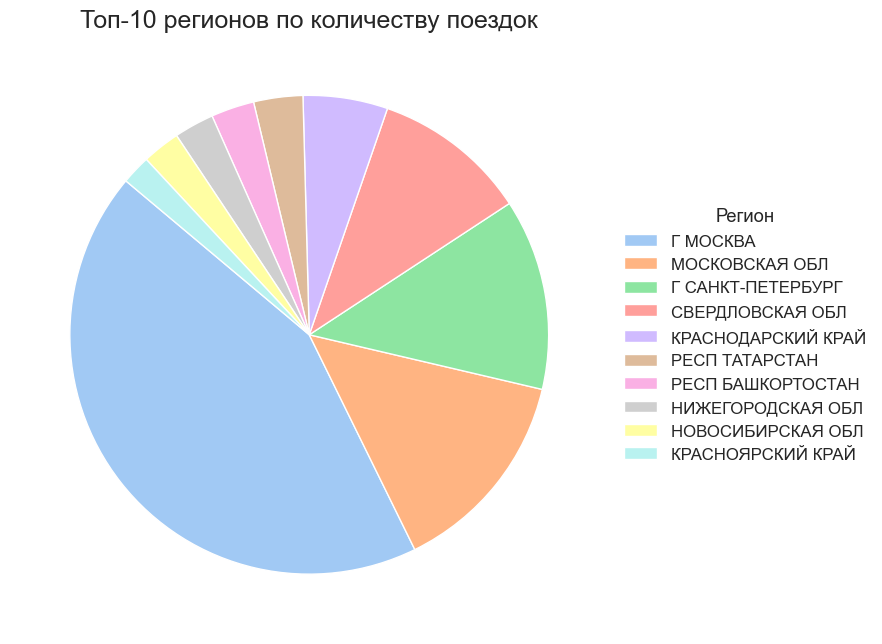

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Группировка
top_regions = df_cleaned['lvn_state_nm'].value_counts().head(10)

labels = top_regions.index
sizes = top_regions.values

# Цвет
colors = sns.color_palette('pastel', len(labels))

# Диаграмма
plt.figure(figsize=(9, 9))
wedges, _ = plt.pie(
    sizes,
    labels=None,  # Убираем подписи
    autopct=None,  # Убираем проценты
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)

# Легенда
plt.legend(wedges, labels, title="Регион", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('Топ-10 регионов по количеству поездок', fontsize=18)

# Вывод
plt.tight_layout()
plt.show()


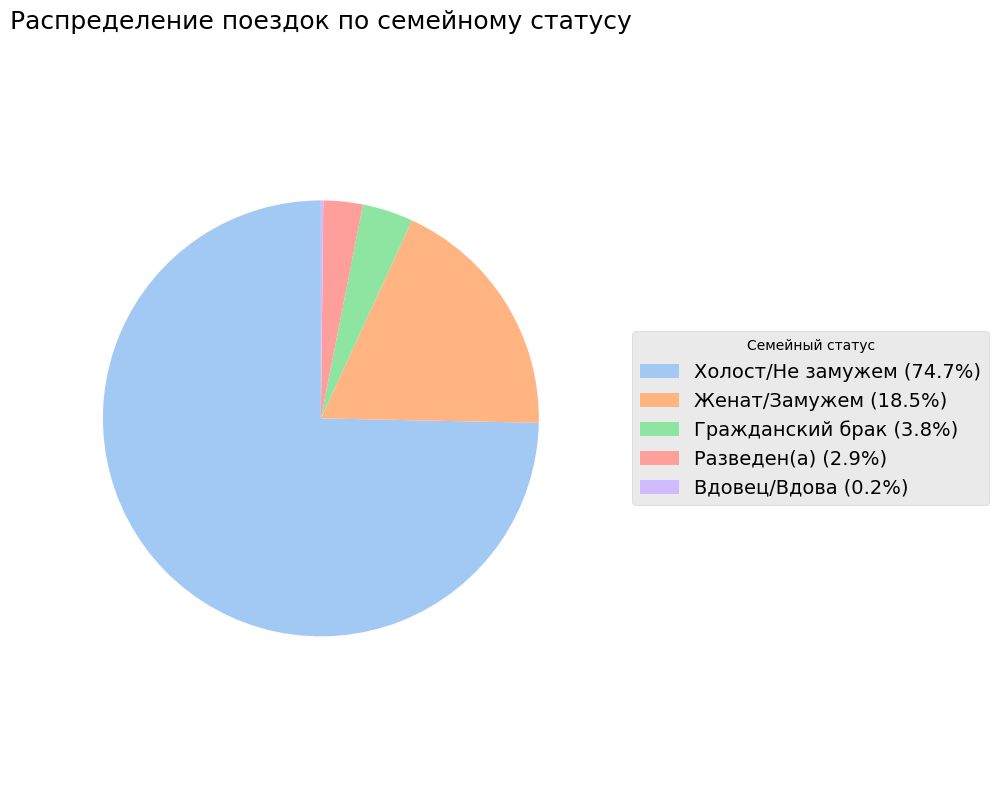

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Словарь
marital_status_dict = {
    'IMR': 'Незарегистрированный брак',
    'MAR': 'Женат/Замужем',
    'DLW': 'Не проживает с супругом',
    'OMR': 'Зарегистрированный брак',
    'CIV': 'Гражданский брак',
    'UNM': 'Холост/Не замужем',
    'DIV': 'Разведен(а)',
    'FAL': 'Никогда не состоял(а) в браке',
    'WID': 'Вдовец/Вдова'
}

# Количество поездок по семейному статусу
marital_counts = df_cleaned['marital_status_cd'].value_counts()

# Преобразуем индексы
marital_counts.index = marital_counts.index.map(marital_status_dict)

# Проценты для легенды
percentages = 100 * marital_counts / marital_counts.sum()

# Диаграмма
plt.figure(figsize=(10, 8))
colors = sns.color_palette('pastel', len(marital_counts))

wedges, _ = plt.pie(
    marital_counts,
    labels=None,
    colors=colors,
    startangle=90
)

# Легенда
plt.legend(
    wedges,
    [f'{label} ({percent:.1f}%)' for label, percent in zip(marital_counts.index, percentages)],
    title='Семейный статус',
    loc='center left',
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=14
)

# График
plt.title('Распределение поездок по семейному статусу', fontsize=18, pad=20)
plt.axis('equal')  
plt.tight_layout()
plt.show()


Пропуски в transport_model: 0
Пропуски в distance_km: 0

Число поездок и средняя дистанция по моделям самокатов:
   transport_model  trip_count  avg_distance_km
0               SL      221483         2.078010
1                E       63940         1.801963
2              Max       63724         2.214083
3     Urban E-Bike        4351         1.989300
4            ES400        3632         1.855954
5            ES200        2921         1.504794
6            ES100        2368         1.431967
7               MK         910         1.708808
8           ES-08S         705         1.452808
9           Techno         201         1.293310
10              LB         103         1.142202
11              ES         100         1.496549
12             B1D          24         0.698849
13           Lucky          18         0.000000


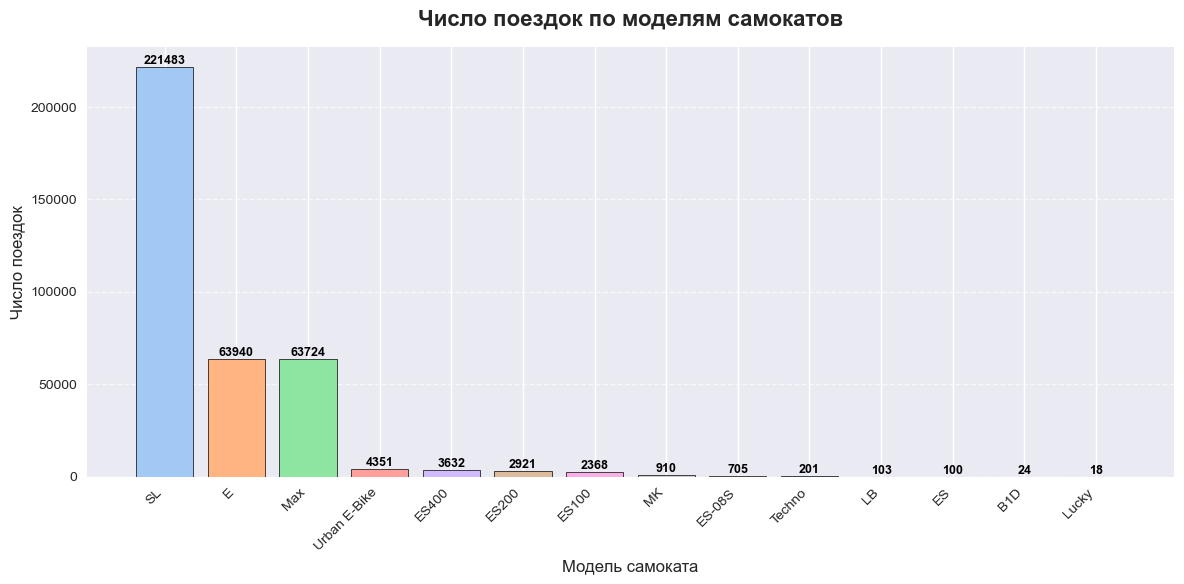

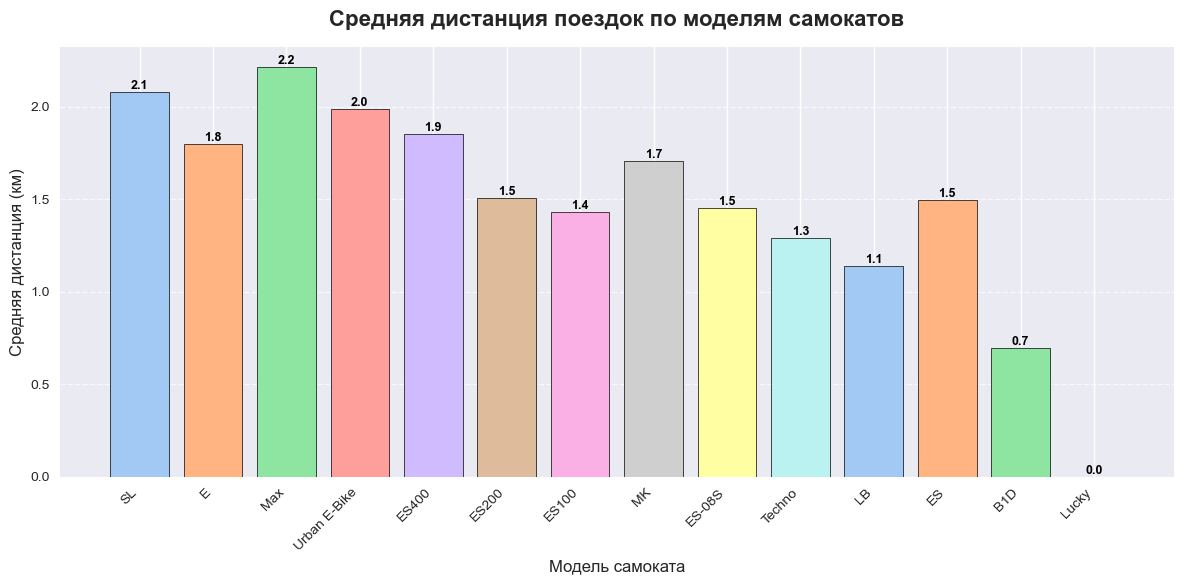

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Стиль
plt.style.use('seaborn-v0_8')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 6)

# Проверка пропусков
print("Пропуски в transport_model:", df_cleaned['transport_model'].isna().sum())
print("Пропуски в distance_km:", df_cleaned['distance_km'].isna().sum())
df_cleaned = df_cleaned.dropna(subset=['transport_model', 'distance_km'])

# Число поездок по моделям
model_trip_counts = df_cleaned['transport_model'].value_counts().reset_index()
model_trip_counts.columns = ['transport_model', 'trip_count']

# Средняя дистанция по моделям
model_avg_distance = df_cleaned.groupby('transport_model')['distance_km'].mean().reset_index()
model_avg_distance.columns = ['transport_model', 'avg_distance_km']

# Объединение
model_stats = pd.merge(model_trip_counts, model_avg_distance, on='transport_model')
model_stats = model_stats.sort_values(by='trip_count', ascending=False)

# Вывод
print("\nЧисло поездок и средняя дистанция по моделям самокатов:")
print(model_stats)

# Цвета
pastel_colors = sns.color_palette('pastel', n_colors=len(model_stats))

# График числа поездок
plt.figure(figsize=(12, 6))
bars = plt.bar(model_stats['transport_model'], model_stats['trip_count'],
               color=pastel_colors, edgecolor='black', linewidth=0.5)

plt.title('Число поездок по моделям самокатов', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Модель самоката', fontsize=12)
plt.ylabel('Число поездок', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')

plt.tight_layout()
plt.savefig('trips_by_model.png', dpi=300, bbox_inches='tight')
plt.show()

# График средней дистанции
plt.figure(figsize=(12, 6))
bars = plt.bar(model_stats['transport_model'], model_stats['avg_distance_km'],
               color=pastel_colors, edgecolor='black', linewidth=0.5)

plt.title('Средняя дистанция поездок по моделям самокатов', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Модель самоката', fontsize=12)
plt.ylabel('Средняя дистанция (км)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')

plt.tight_layout()
plt.savefig('avg_distance_by_model.png', dpi=300, bbox_inches='tight')
plt.show()
